#  Independent samples (clicks on website  for three different cities)

In [1]:

data1 <- read.csv('dataIndependentMeans.csv', sep =';')

In [2]:
str(data1)

'data.frame':	4506 obs. of  2 variables:
 $ Clicks: int  10 34 32 4 3 2 4 3 2 7 ...
 $ City  : Factor w/ 3 levels "Moscow","Novosibirsk",..: 3 3 3 3 2 3 1 1 2 1 ...


In [19]:
MoscowClicks <- data1[data1$City == 'Moscow',1]

In [42]:
str(MoscowClicks)

 int [1:1974] 4 3 7 1 1 2 2 2 1 2 ...


In [20]:
NovosibirskClicks <- data1[data1$City == 'Novosibirsk',1]

In [43]:
str(NovosibirskClicks)

 int [1:600] 3 2 18 48 1 1 2 22 64 7 ...


In [21]:
SaintPetersburgClicks <- data1[data1$City == 'SaintPetersburg',1]

In [44]:
str(SaintPetersburgClicks)

 int [1:1932] 10 34 32 4 2 7 7 2 13 2 ...


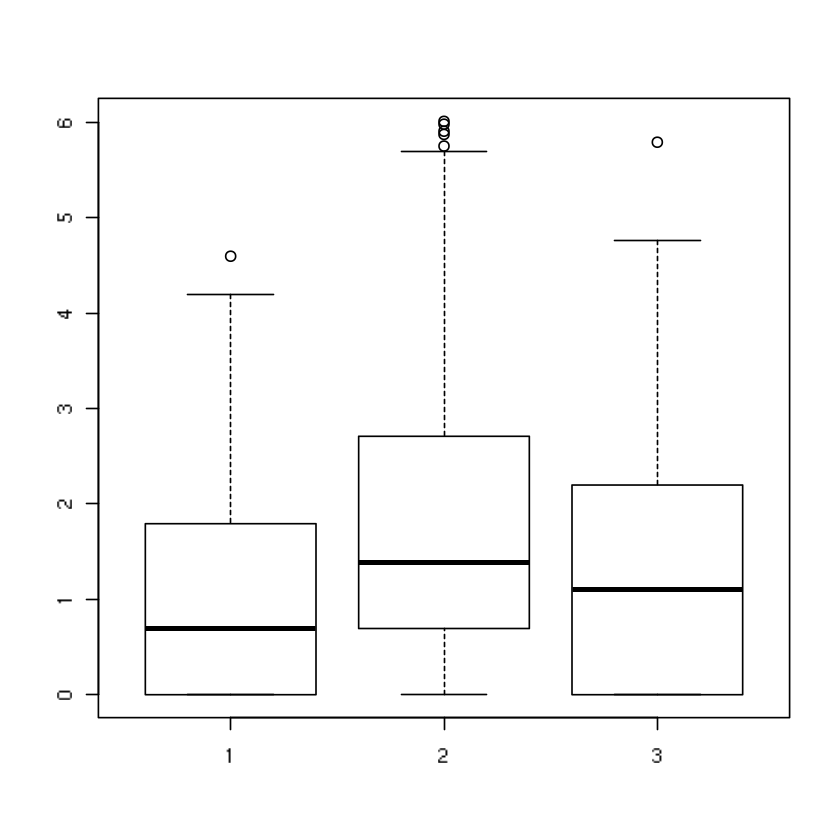

In [48]:
# converting LogNormal to approximately Normal distribution
boxplot(log(MoscowClicks),log(NovosibirskClicks),log(SaintPetersburgClicks))

In [27]:
mean(MoscowClicks)

[1] 5.379433

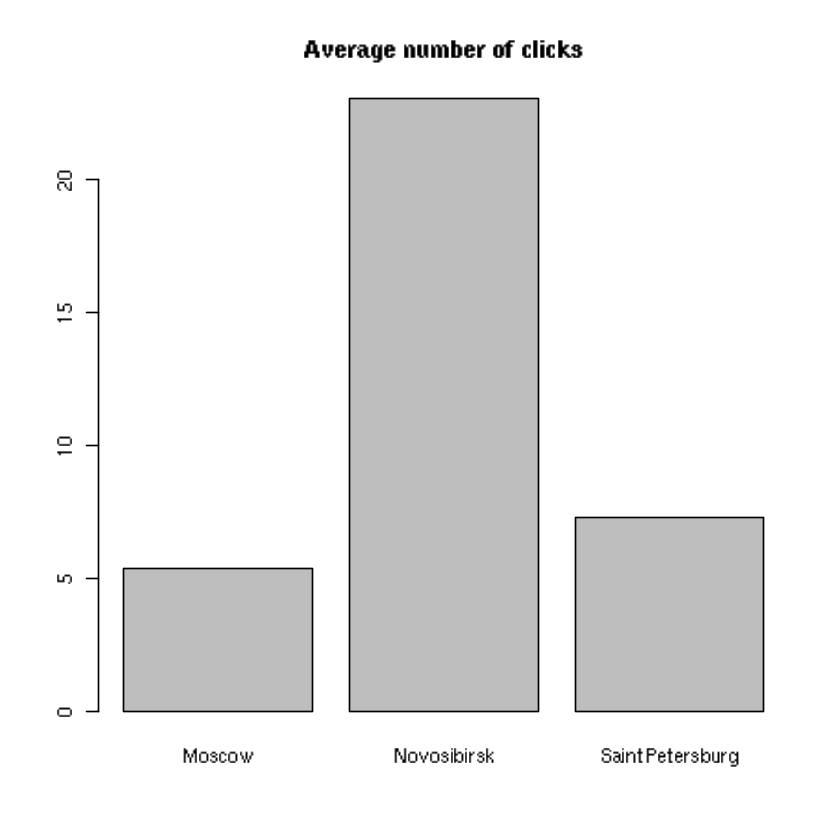

In [39]:
barplot(c(mean(MoscowClicks),mean(NovosibirskClicks),mean(SaintPetersburgClicks)),
   names = c('Moscow', 'Novosibirsk', 'SaintPetersburg'), main ='Average number of clicks')

## One Factor Analysis of Variance (Samples' distributions must be close to Normal)
One factor analysis of variance (Snedecor and Cochran, 1989) is a special case of analysis of variance (ANOVA), for one factor of interest, and a generalization of the two-sample t-test. The two-sample t-test is used to decide whether two groups (levels) of a factor have the same mean. One-way analysis of variance generalizes this to levels where k, the number of levels, is greater than or equal to 2.

In [51]:
anova <- aov(log(Clicks)~City, data = data1)

In [53]:
summary(anova)

              Df Sum Sq Mean Sq F value Pr(>F)    
City           2    226  113.04   84.75 <2e-16 ***
Residuals   4503   6006    1.33                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

*Hypothesis of similiarity of the groups is rejected*

## Nonparametric Kruskal-Wallis Rank Sum Test

In [58]:
kruskal.test(Clicks ~ City, data = data1)


	Kruskal-Wallis rank sum test

data:  Clicks by City
Kruskal-Wallis chi-squared = 99.404, df = 2, p-value < 2.2e-16


*Hypothesis of similiarity of the groups is also rejected*

#  Dependent samples (clicks for three months on the same service businesses advertisment )

In [59]:
data2 <- read.csv('dataDependentMeans.csv',sep=';')

In [60]:
str(data2)

'data.frame':	429 obs. of  2 variables:
 $ Clicks: int  134288 140994 143458 92990 98363 112722 94350 60217 51254 53648 ...
 $ Month : Factor w/ 3 levels "April","February",..: 2 2 2 2 2 2 2 2 2 2 ...


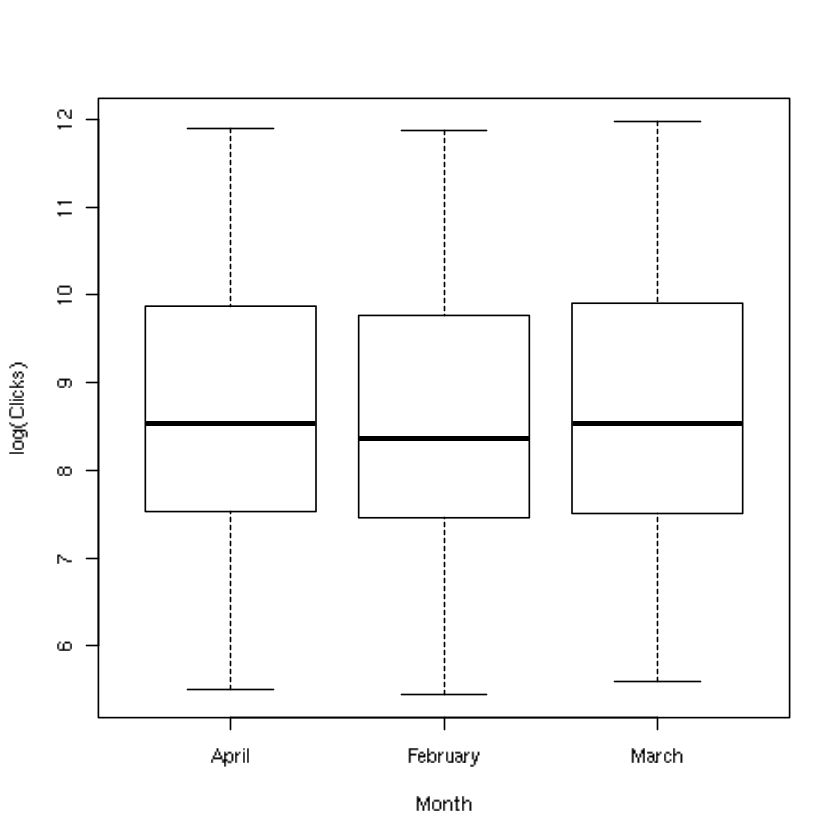

In [62]:
#converting LogNormal to Normal distribution 
boxplot(log(Clicks) ~ Month, data = data2)

In [89]:
ClicksInMonth <- matrix(c(data2[data2$Month == 'February',1],data2[data2$Month == 'March',1],
                   data2[data2$Month == 'April',1]), ncol =3 )

In [90]:
colnames(ClicksInMonth) <- c('February', 'March', 'April')

In [91]:
head(ClicksInMonth)

February,March,April
134288,143783,127115
140994,155329,127053
143458,159350,146895
92990,110620,106936
98363,114078,105954
112722,113192,105270


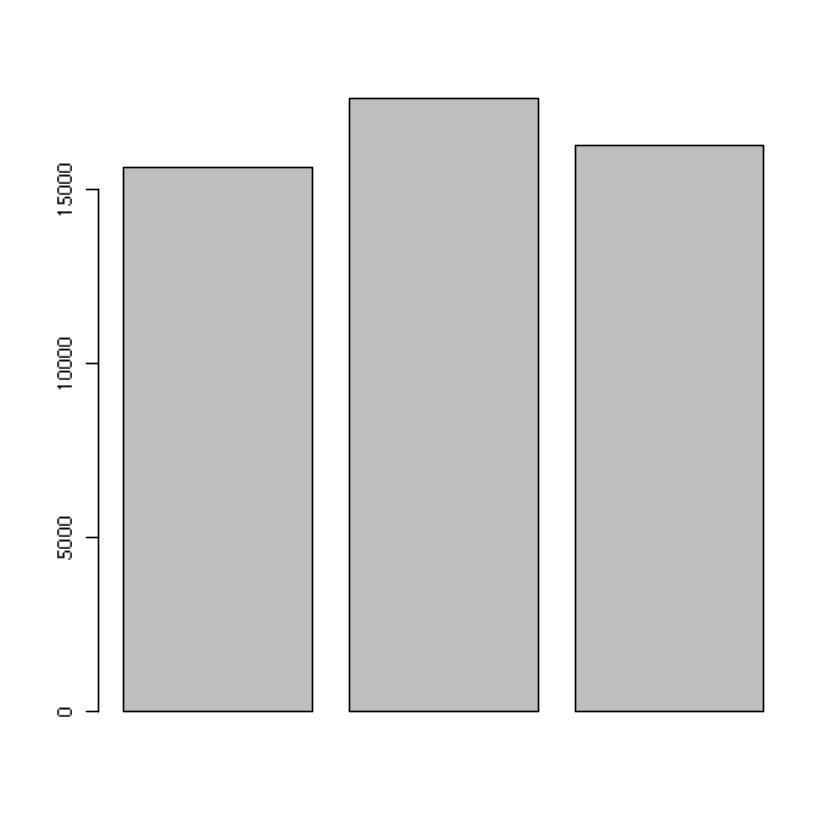

In [113]:
barplot(c(mean(ClicksInMonth[,1]),mean(ClicksInMonth[,2]),mean(ClicksInMonth[,3])))

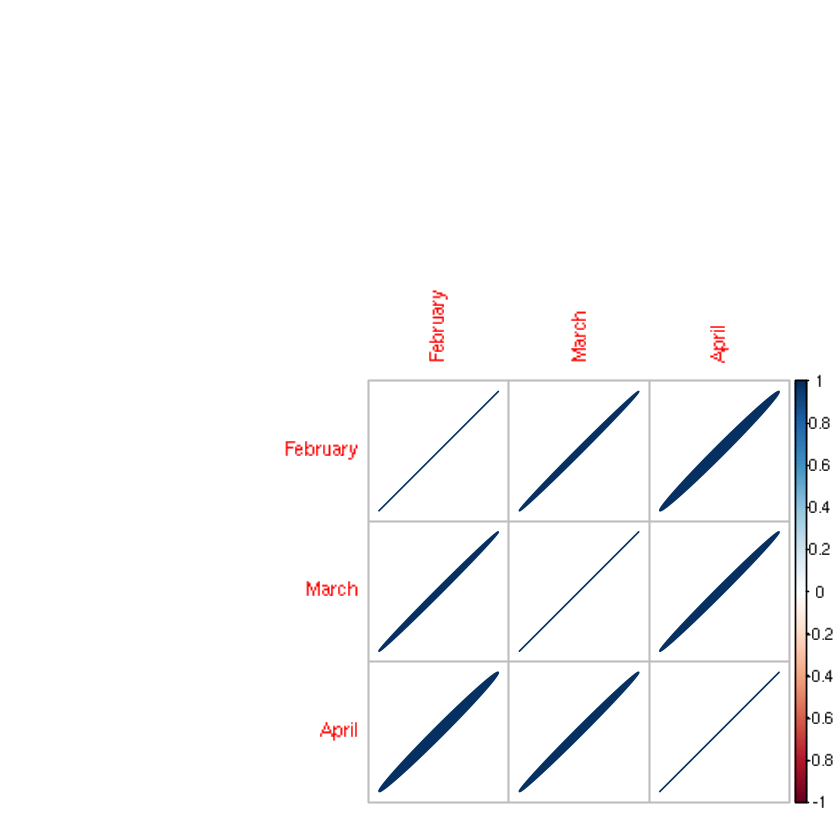

In [95]:
#correlation matrix
library(corrplot)
corrplot(cor(ClicksInMonth), 'ellipse')

*Corrplot indicates that samples in different groups are strongly dependent(correlated)*

## Nonparametric Friedman Rank Sum Test (for dependent samples)

In [112]:
friedman.test(ClicksInMonth)


	Friedman rank sum test

data:  ClicksInMonth
Friedman chi-squared = 112.55, df = 2, p-value < 2.2e-16


*test has very small p -value which yields to inequality of the means among  3 groups*